<a href="https://colab.research.google.com/github/mp2463/Genetic-Disorder-Prediction-using-Deep-Learning/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import math,time,random,datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

from scipy import stats
from scipy.stats import norm,skew

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [3]:
train = pd.read_csv('/content/train_genetic_disorders.csv')
test = pd.read_csv('/content/test_genetic_disorders.csv')


In [4]:
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [5]:
print("Dimensionality of the train dataset: ", train.shape)

Dimensionality of the train dataset:  (22083, 45)


In [6]:
train.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

<Axes: >

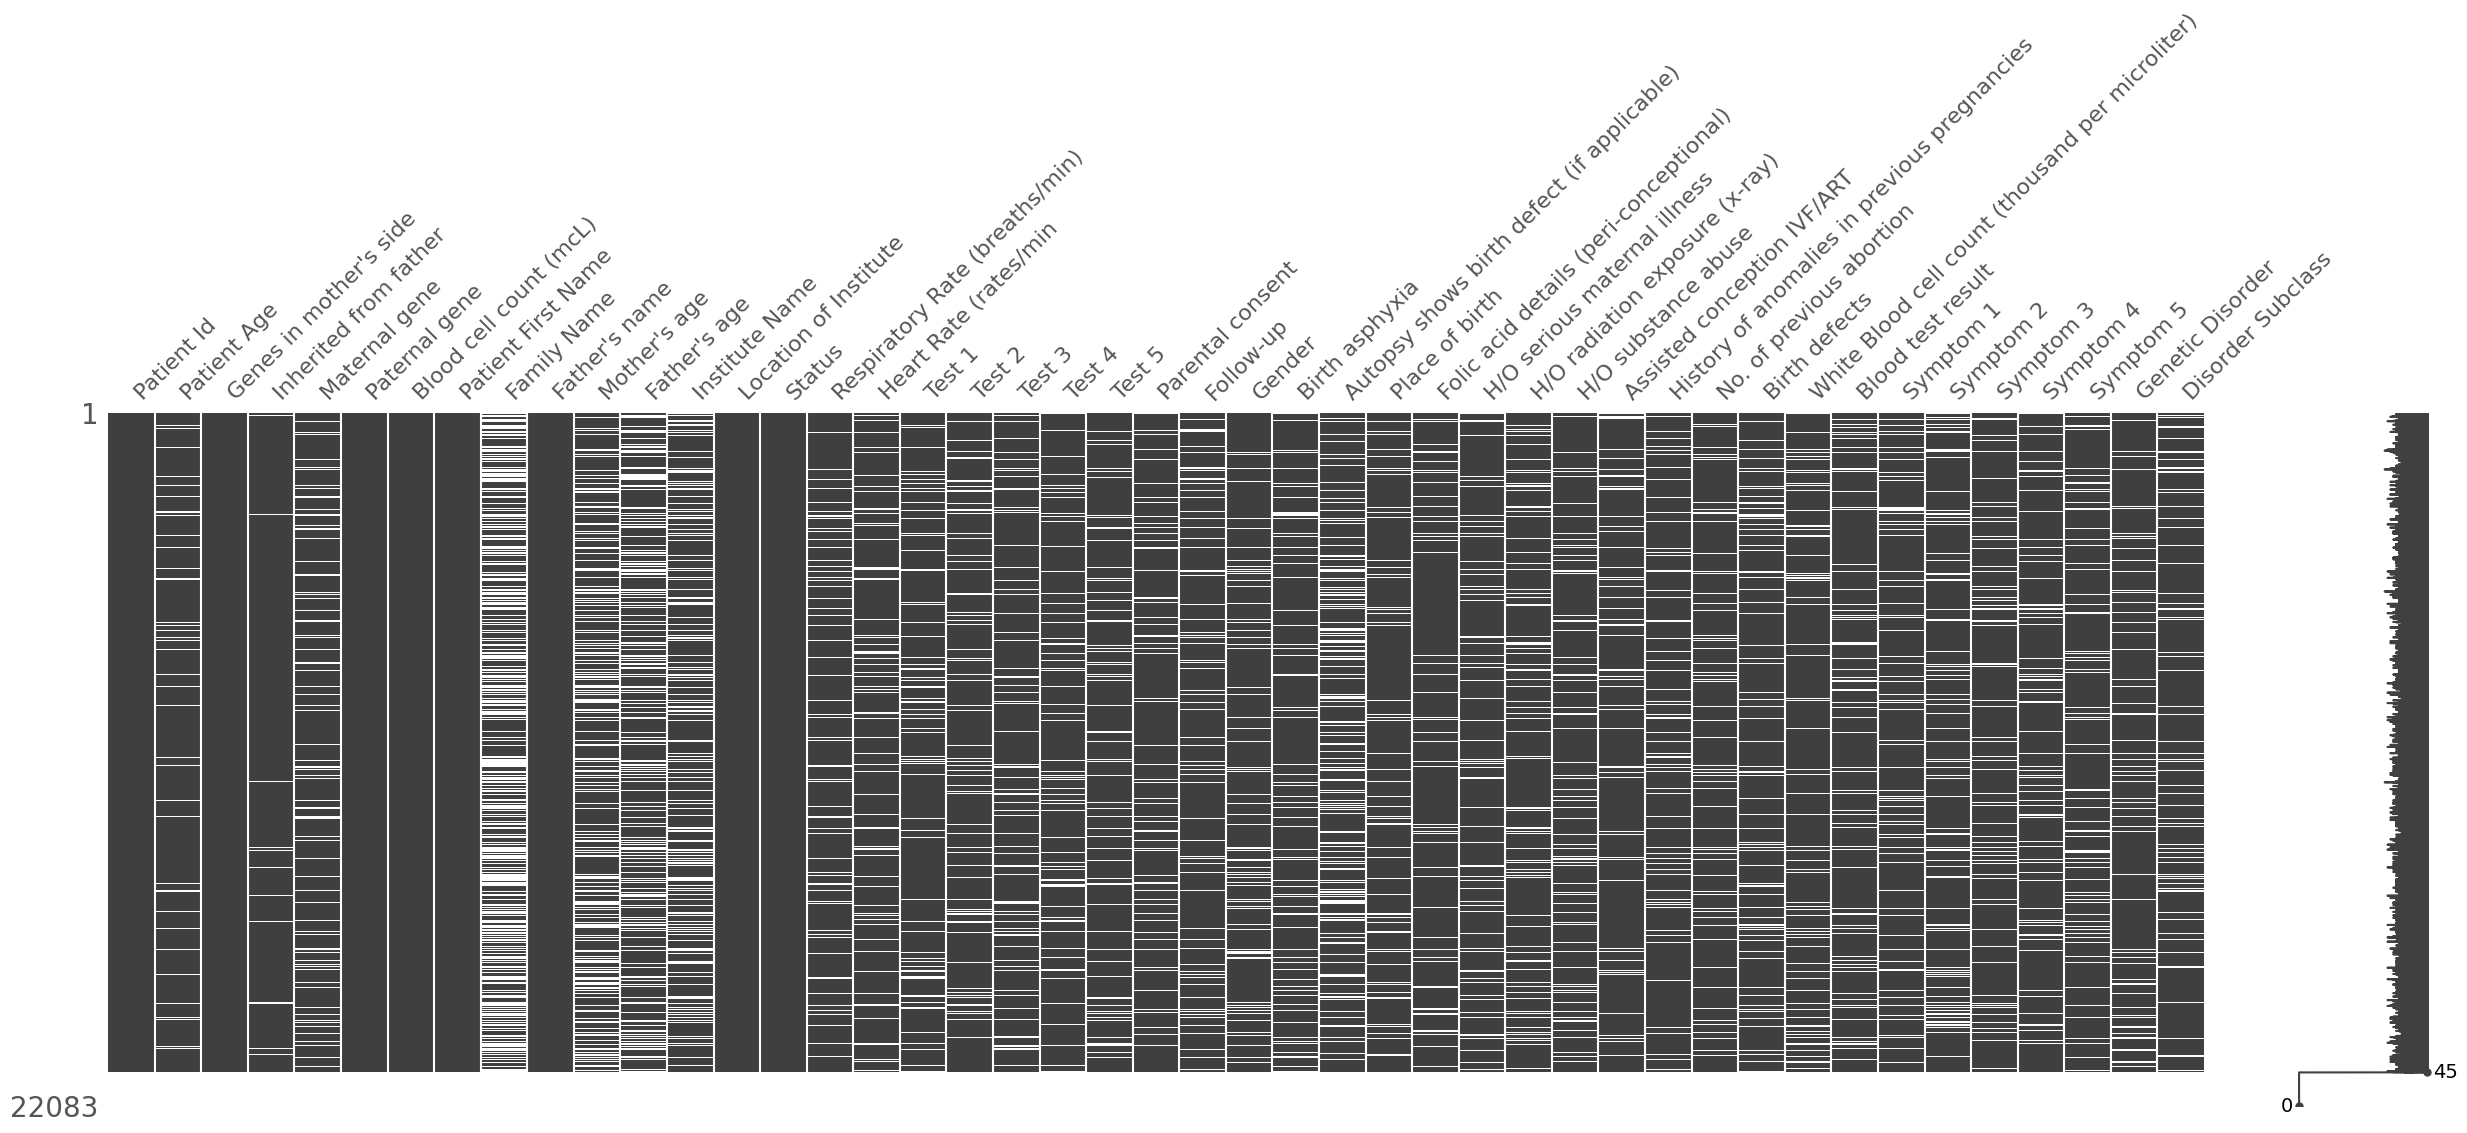

In [8]:
missingno.matrix(train,figsize=(30,9))

In [9]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1)

    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataset has 45 columns and 22083 observations.

 There are 45 columns that have missing values.


,Missing Values,% of Total Values
Family Name,10312,46.7
Mother's age,6790,30.7
Father's age,6761,30.6
Institute Name,5932,26.9
Autopsy shows birth defect (if applicable),5236,23.7
Maternal gene,3766,17.1
Symptom 2,3184,14.4
H/O substance abuse,3162,14.3
Test 5,3144,14.2
Follow-up,3142,14.2


In [10]:
train.dtypes

,0
Patient Id,object
Patient Age,float64
Genes in mother's side,object
Inherited from father,object
Maternal gene,object
Paternal gene,object
Blood cell count (mcL),float64
Patient First Name,object
Family Name,object
Father's name,object


In [11]:
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [12]:
train['Patient Id'].duplicated().any()

True

In [13]:
train['Patient Age'].describe()

,Patient Age
count,19643.000000
mean,6.974851
std,4.322584
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,14.000000


In [14]:
train['Patient Age'].isnull().any()

True

In [15]:
train["Genes in mother's side"].unique()

array(['Yes', 'No', nan], dtype=object)

Genes in mother's side
Yes    12509
No      8502
Name: count, dtype: int64


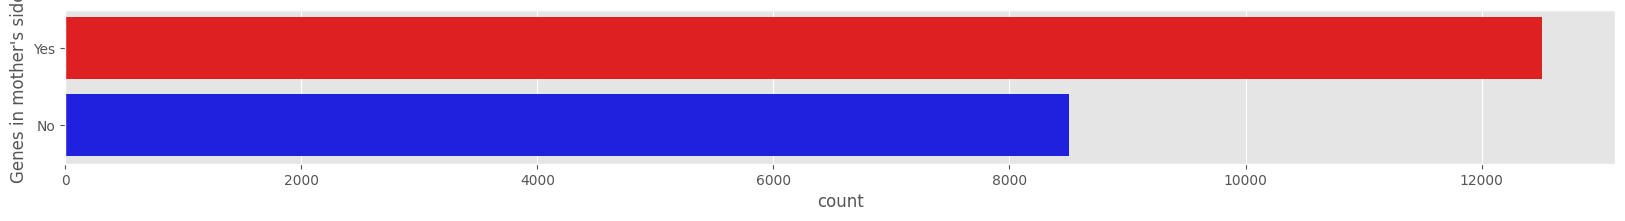

In [27]:
fig = plt.figure(figsize=(20,2))
colors = {'Yes': 'red', 'No': 'blue'}
sns.countplot(y= "Genes in mother's side",data= train, palette=colors)

print(train["Genes in mother's side"].value_counts())

In [17]:
train["Inherited from father"].unique()

array(['No', 'Yes', nan], dtype=object)

Inherited from father
No     12508
Yes     8216
Name: count, dtype: int64


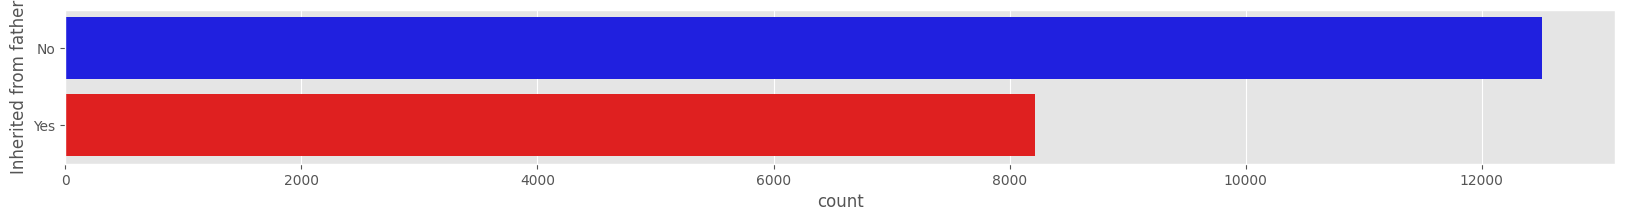

In [26]:
fig = plt.figure(figsize=(20,2))
colors = {'Yes': 'red', 'No': 'blue'}
sns.countplot(y= "Inherited from father",data= train, palette=colors)

print(train["Inherited from father"].value_counts())

In [19]:
train["Maternal gene"].unique()

array(['Yes', 'No', nan], dtype=object)

Maternal gene
Yes    10125
No      8192
Name: count, dtype: int64


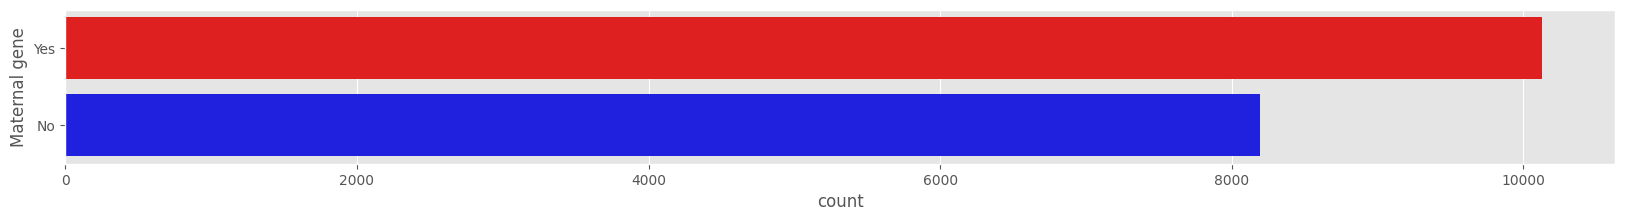

In [22]:
fig = plt.figure(figsize=(20,2))
colors = {'Yes': 'red', 'No': 'blue'}  # Define color mapping
sns.countplot(y="Maternal gene", data=train, palette=colors)

print(train["Maternal gene"].value_counts())

In [28]:
train["Paternal gene"].unique()

array(['No', 'Yes', nan], dtype=object)

Paternal gene
No     11887
Yes     9124
Name: count, dtype: int64


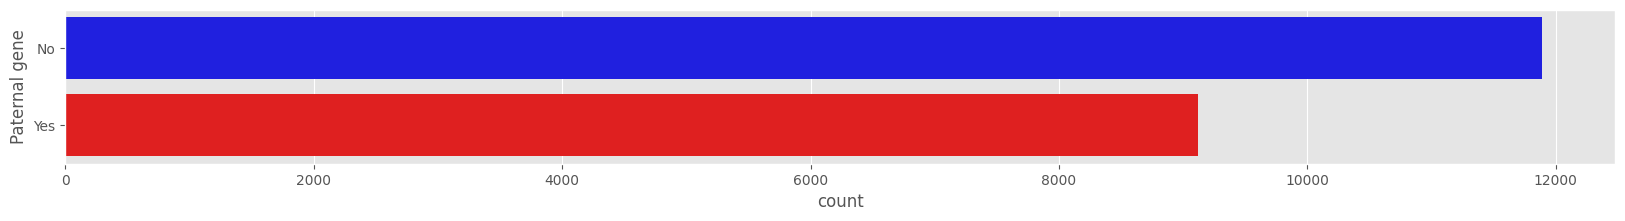

In [29]:
fig = plt.figure(figsize=(20,2))
colors = {'Yes': 'red', 'No': 'blue'}
sns.countplot(y= "Paternal gene",data= train, palette=colors)

print(train["Paternal gene"].value_counts())

In [30]:
train['Blood cell count (mcL)'].describe()

,Blood cell count (mcL)
count,21011.000000
mean,4.899004
std,0.199829
min,4.092727
25%,4.763230
50%,4.899548
75%,5.033977
max,5.609829


In [31]:
train['Blood cell count (mcL)'].isnull().any()

True

<Axes: xlabel='Blood cell count (mcL)', ylabel='Density'>

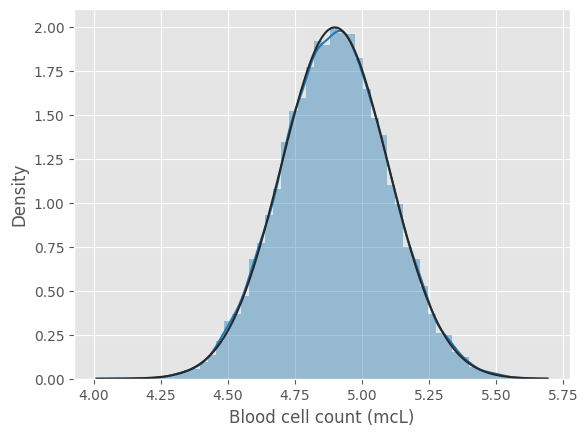

In [32]:
sns.distplot(train['Blood cell count (mcL)'], fit= norm, color= 'tab:blue')

<Axes: xlabel='Blood cell count (mcL)'>

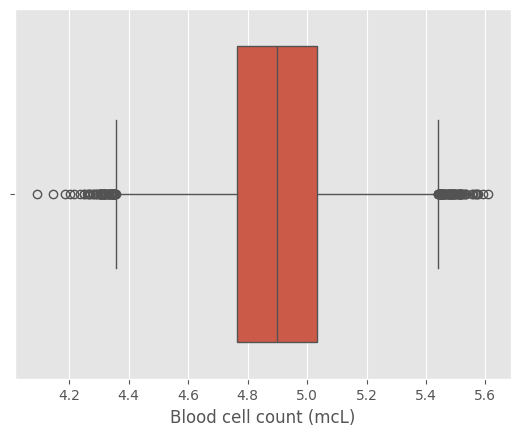

In [33]:
sns.boxplot(x= train['Blood cell count (mcL)'])

In [34]:
train["Mother's age"].isnull().any()

True

In [35]:
train["Mother's age"].describe()

,Mother's age
count,15293.000000
mean,34.522527
std,9.847256
min,18.000000
25%,26.000000
50%,35.000000
75%,43.000000
max,51.000000


In [36]:
train["Father's age"].isnull().any()

True

In [37]:
train["Father's age"].describe()

,Father's age
count,15322.000000
mean,41.942436
std,13.027701
min,20.000000
25%,31.000000
50%,42.000000
75%,53.000000
max,64.000000


In [38]:
train["Status"].unique()

array(['Alive', 'Deceased', nan], dtype=object)

Status
Alive       10572
Deceased    10439
Name: count, dtype: int64


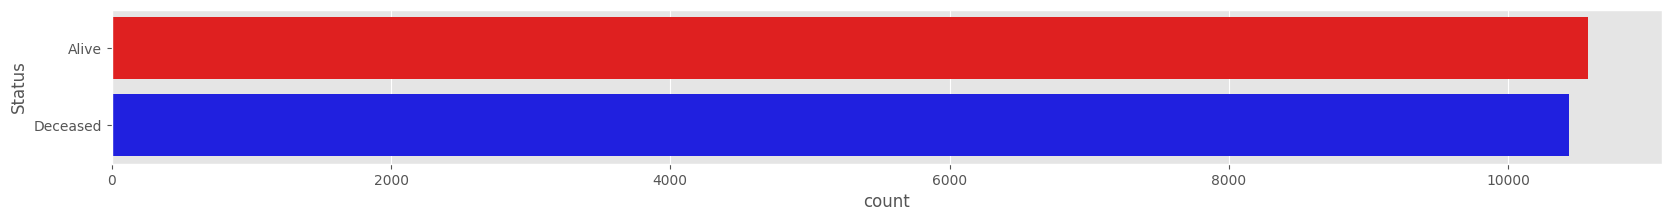

In [40]:
fig = plt.figure(figsize=(20,2))
colors = {'Alive': 'red', 'Deceased': 'blue'}
sns.countplot(y= "Status",data= train, palette=colors)

print(train["Status"].value_counts())

In [41]:
train["Respiratory Rate (breaths/min)"].unique()

array(['Normal (30-60)', 'Tachypnea', nan], dtype=object)

Respiratory Rate (breaths/min)
Normal (30-60)    9595
Tachypnea         9357
Name: count, dtype: int64


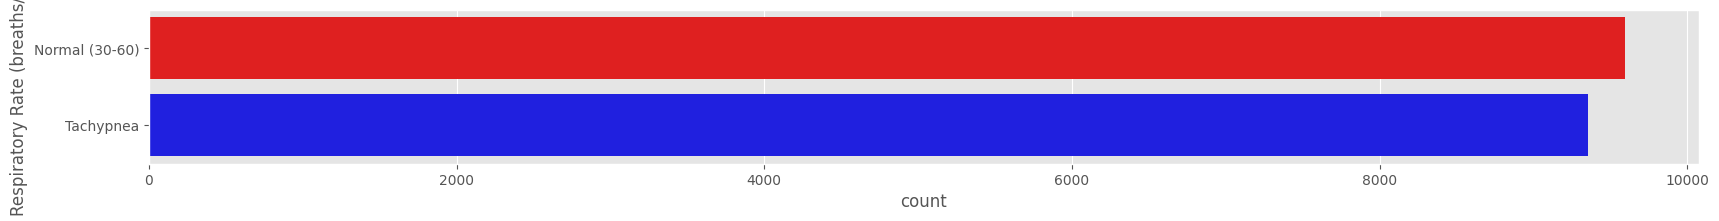

In [43]:
fig = plt.figure(figsize=(20,2))
colors = {'Normal (30-60)': 'red', 'Tachypnea': 'blue'}
sns.countplot(y= "Respiratory Rate (breaths/min)",data= train, palette=colors)

print(train["Respiratory Rate (breaths/min)"].value_counts())

In [49]:
train["Heart Rate (rates/min"].unique()

array(['Normal', 'Tachycardia', nan], dtype=object)

Heart Rate (rates/min
Normal         9715
Tachycardia    9271
Name: count, dtype: int64


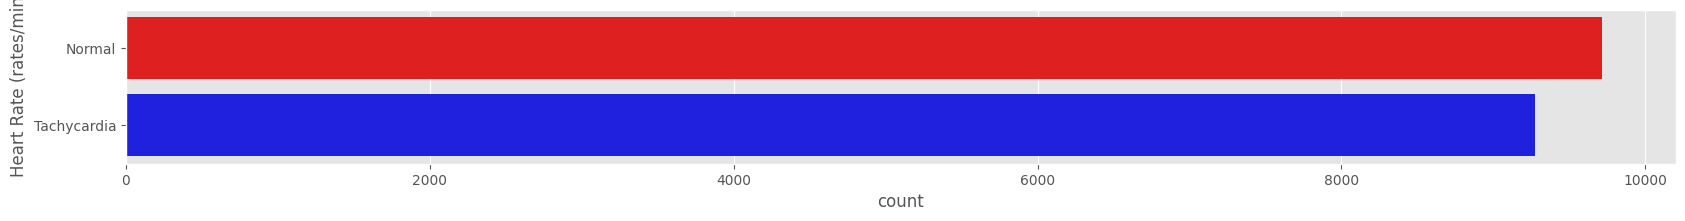

In [50]:
fig = plt.figure(figsize=(20,2))
colors = {'Normal': 'red', 'Tachycardia': 'blue'}
sns.countplot(y= "Heart Rate (rates/min",data= train, palette=colors)

print(train["Heart Rate (rates/min"].value_counts())

In [51]:
print(f"Uniqueness for Test 1 is: {train['Test 1'].unique()}")
print()
print(f"Uniqueness for Test 2 is: {train['Test 2'].unique()}")
print()
print(f"Uniqueness for Test 3 is: {train['Test 3'].unique()}")
print()
print(f"Uniqueness for Test 4 is: {train['Test 4'].unique()}")
print()
print(f"Uniqueness for Test 5 is: {train['Test 5'].unique()}")

Uniqueness for Test 1 is: [ 0. nan]

Uniqueness for Test 2 is: [nan  0.]

Uniqueness for Test 3 is: [nan  0.]

Uniqueness for Test 4 is: [ 1. nan]

Uniqueness for Test 5 is: [ 0. nan]


In [52]:
print(f"Count for Test 1 is: {train['Test 1'].value_counts()}")
print()
print(f"Count for Test 2 is: {train['Test 2'].value_counts()}")
print()
print(f"Count for Test 3 is: {train['Test 3'].value_counts()}")
print()
print(f"Count for Test 4 is: {train['Test 4'].value_counts()}")
print()
print(f"Count for Test 5 is: {train['Test 5'].value_counts()}")

Count for Test 1 is: Test 1
0.0    18992
Name: count, dtype: int64

Count for Test 2 is: Test 2
0.0    18958
Name: count, dtype: int64

Count for Test 3 is: Test 3
0.0    18970
Name: count, dtype: int64

Count for Test 4 is: Test 4
1.0    18962
Name: count, dtype: int64

Count for Test 5 is: Test 5
0.0    18939
Name: count, dtype: int64


In [53]:
train["Parental consent"].unique()

array(['Yes', nan], dtype=object)

In [54]:
train["Parental consent"].value_counts()

,count
Parental consent,
Yes,18991


In [55]:
train["Follow-up"].unique()

array(['High', 'Low', nan], dtype=object)

Follow-up
Low     9564
High    9377
Name: count, dtype: int64


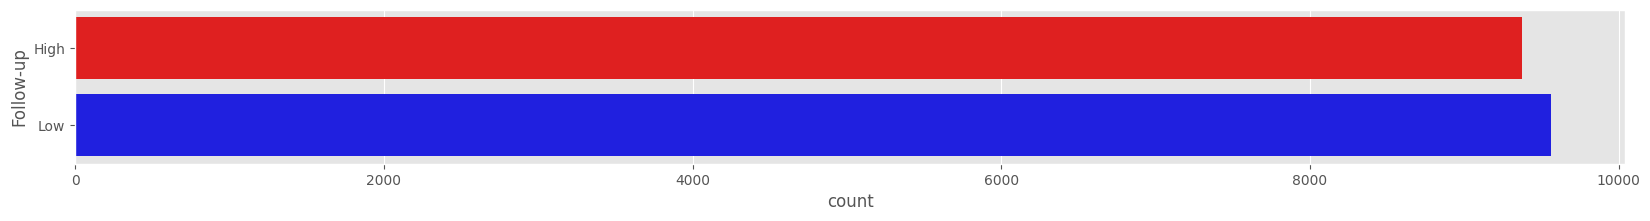

In [56]:
fig = plt.figure(figsize=(20,2))
colors = {'High': 'red', 'Low': 'blue'}
sns.countplot(y= "Follow-up",data= train, palette=colors)

print(train["Follow-up"].value_counts())

In [57]:
train["Gender"].unique()

array([nan, 'Male', 'Female', 'Ambiguous'], dtype=object)

Gender
Ambiguous    6385
Male         6321
Female       6242
Name: count, dtype: int64


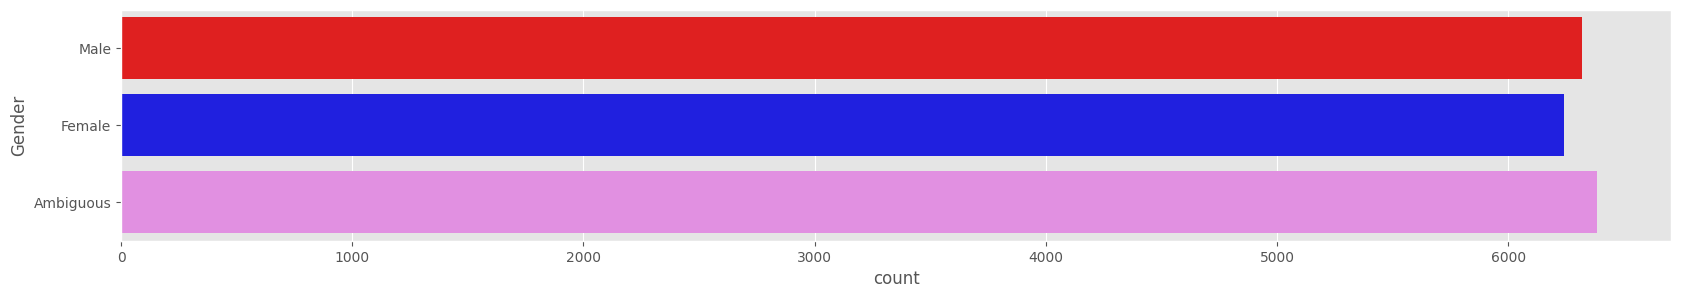

In [60]:
fig = plt.figure(figsize=(20,3))
colors = {'Male': 'red', 'Female': 'blue', 'Ambiguous': 'violet'}
sns.countplot(y= "Gender",data= train, palette=colors)

print(train["Gender"].value_counts())

In [61]:
train["Birth asphyxia"].unique()

array([nan, 'No', 'No record', 'Not available', 'Yes'], dtype=object)

Birth asphyxia
Yes              4839
Not available    4755
No record        4752
No               4607
Name: count, dtype: int64


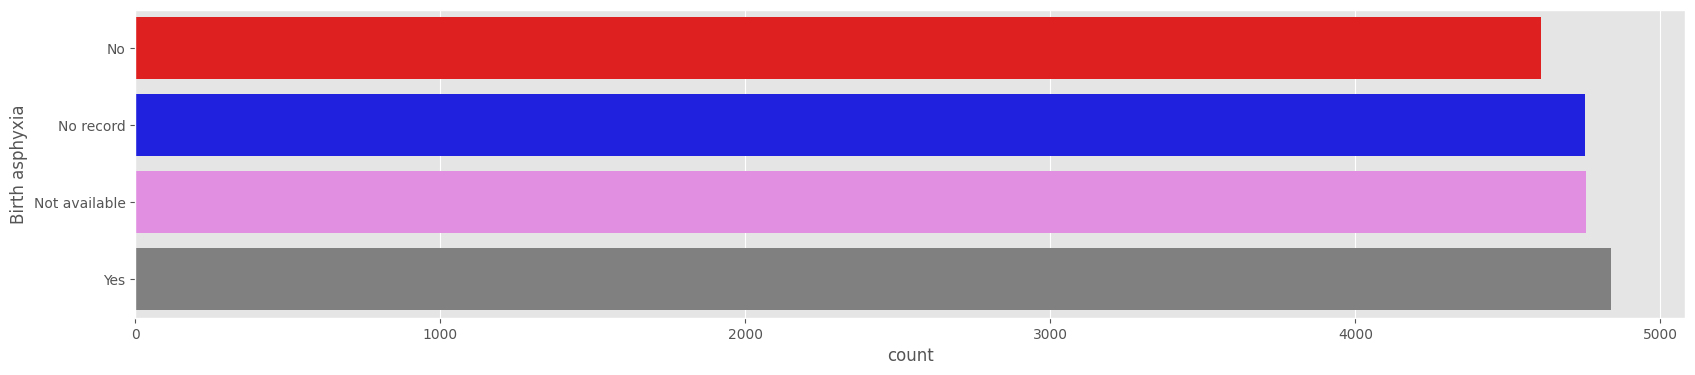

In [62]:
fig = plt.figure(figsize=(20,4))
colors = {'No': 'red', 'No record': 'blue', 'Not available': 'violet', 'Yes': 'grey'}
sns.countplot(y= "Birth asphyxia",data= train, palette=colors)

print(train["Birth asphyxia"].value_counts())

In [63]:
train["Autopsy shows birth defect (if applicable)"].unique()

array(['Not applicable', nan, 'No', 'Yes'], dtype=object)

Autopsy shows birth defect (if applicable)
Not applicable    10572
Yes                3217
No                 3058
Name: count, dtype: int64


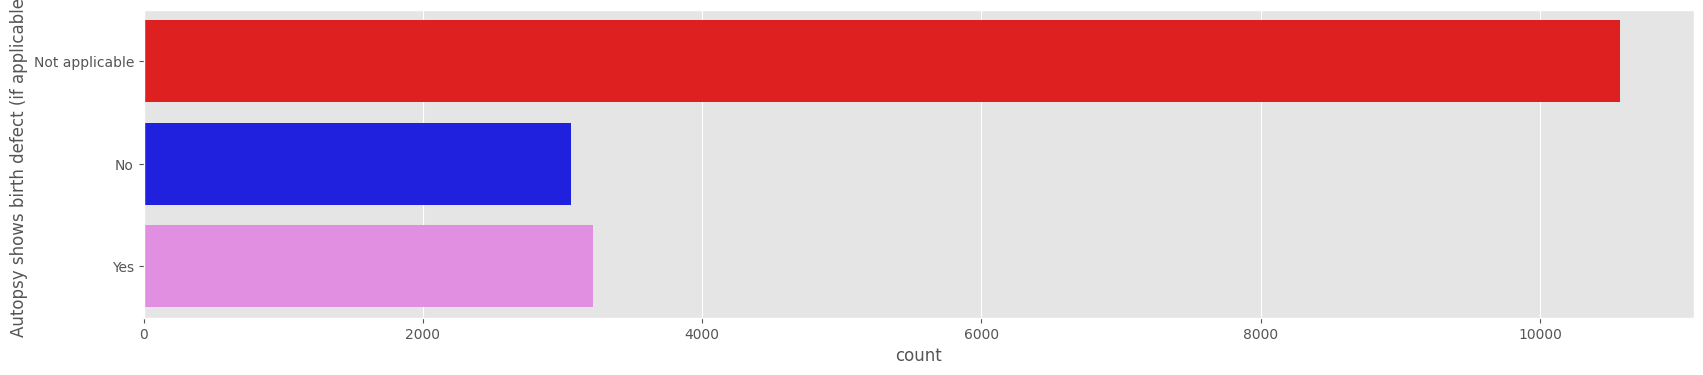

In [64]:
fig = plt.figure(figsize=(20,4))
colors = {'Not applicable': 'red', 'No': 'blue', 'Yes': 'violet'}
sns.countplot(y= "Autopsy shows birth defect (if applicable)",data= train, palette=colors)

print(train["Autopsy shows birth defect (if applicable)"].value_counts())

In [65]:
X = train[train["Autopsy shows birth defect (if applicable)"].isnull() == True]
X['Status'].value_counts()

,count
Status,
Deceased,4164
